In [93]:
import numpy as np

In [94]:
import pandas as pd

In [95]:
train=pd.read_csv("titanictrain.csv")

In [96]:
test=pd.read_csv("titanicdatasettest.csv")

In [97]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [98]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [100]:
def bar_plot(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    

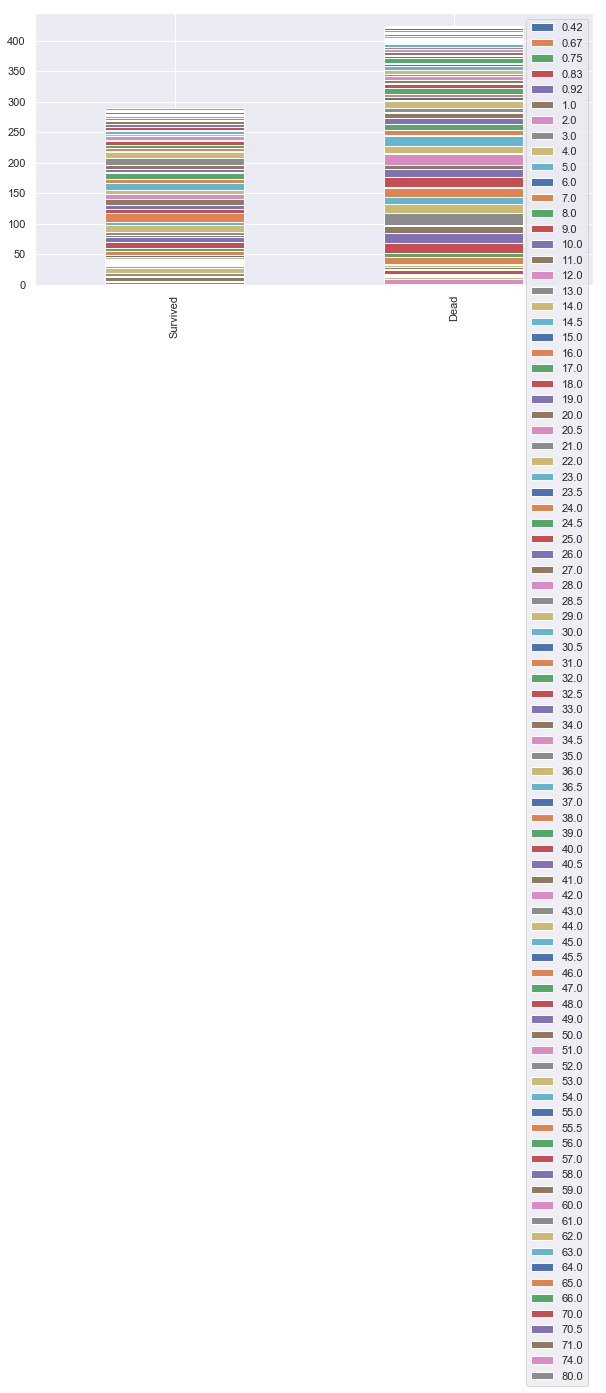

In [101]:
bar_plot('Age')

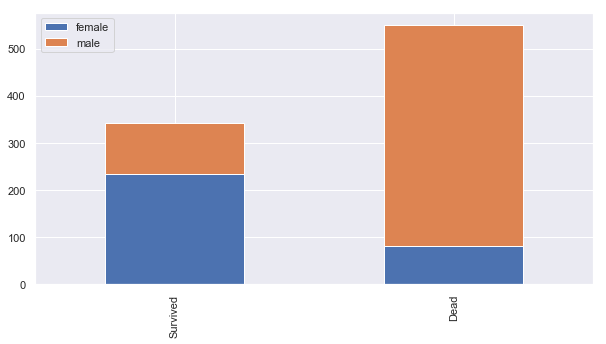

In [102]:
bar_plot('Sex')

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


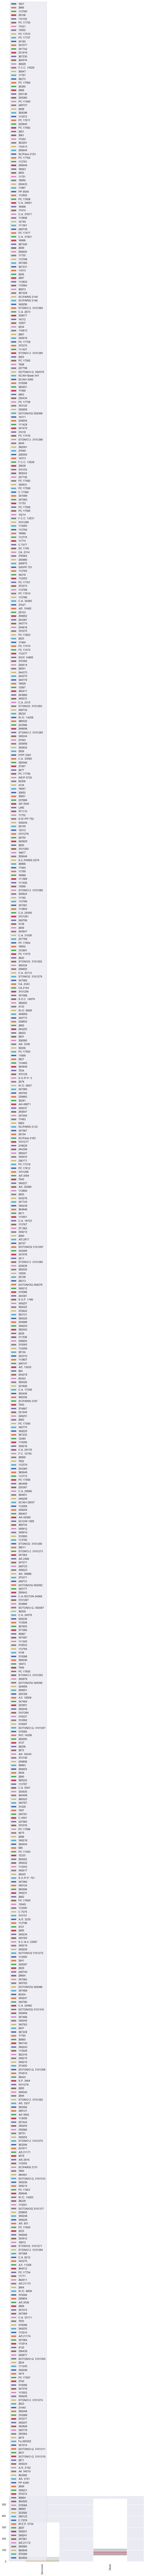

In [104]:
bar_plot('Ticket')

In [105]:
# feature engineering
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)


In [106]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Mme           1
Countess      1
Ms            1
Jonkheer      1
Lady          1
Don           1
Sir           1
Name: Title, dtype: int64

In [107]:
title={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Major":3,"Col":3,"Mlle":3,"Don":3,"Mme":3,"Lady":3,"Capt":3,"Sir":3,"Ms":3,"Countess":3,"Jonkheer":3}
for dataset in train_test_data:
    dataset["Title"]=dataset['Title'].map(title)

In [108]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

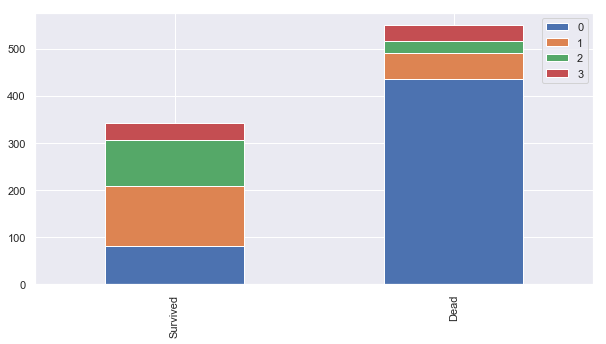

In [109]:
bar_plot('Title')

In [110]:
train.drop('Name',axis=1,inplace=True)

In [111]:
test.drop('Name',axis=1,inplace=True)

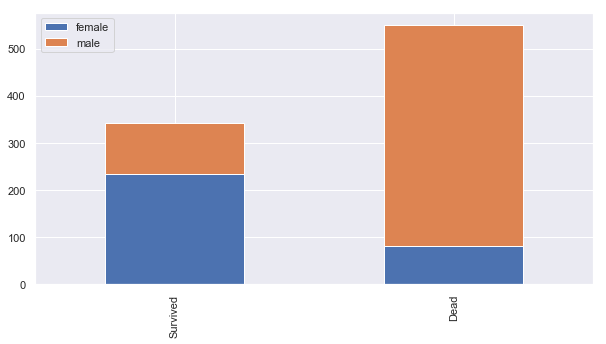

In [112]:
bar_plot("Sex")

In [113]:
sex={'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex)

In [114]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [115]:
train['Age'].fillna(train.groupby('Title')['Age'].transform("median"),inplace=True)

In [116]:
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"),inplace=True)

C:\Users\abhis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


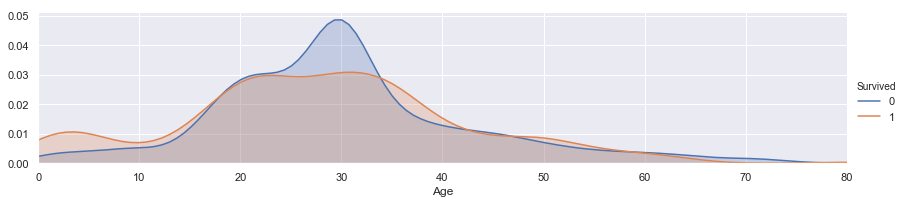

In [117]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

In [118]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset["Age"]<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset["Age"]<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset["Age"]<=62),'Age']=3,
    dataset.loc[dataset['Age']>62,'Age']=4
    

In [119]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


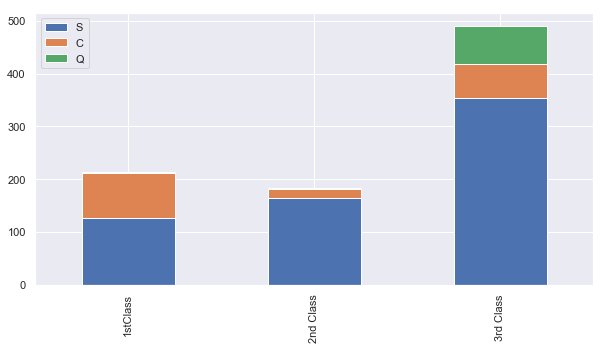

In [120]:
pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1stClass','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [121]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna("S")
    

In [122]:
embarked={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked)

In [123]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [124]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

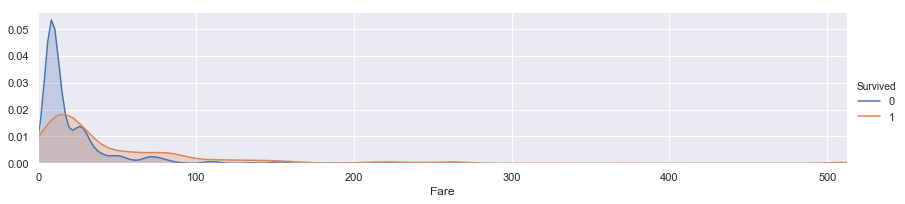

In [125]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

In [126]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30)&(dataset["Fare"]<=100),'Fare']=2,
    dataset.loc[(dataset['Fare']>100),'Fare']=3

In [127]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
E101           3
F33            3
F2             3
E25            2
C78            2
F G73          2
B20            2
B49            2
C125           2
D17            2
B35            2
C123           2
C92            2
B5             2
C93            2
C68            2
C2             2
D35            2
E67            2
E8             2
C83            2
B58 B60        2
D26            2
B22            2
E33            2
              ..
D48            1
D49            1
E38            1
A19            1
B50            1
C148           1
B78            1
F E69          1
D11            1
A20            1
B86            1
A26            1
E63            1
C54            1
C85            1
E40            1
A32            1
E77            1
C32            1
E46            1
C49            1
E31            1
A14            1
B42            1
B19            1
C110           1
D50            1
D46           

In [128]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

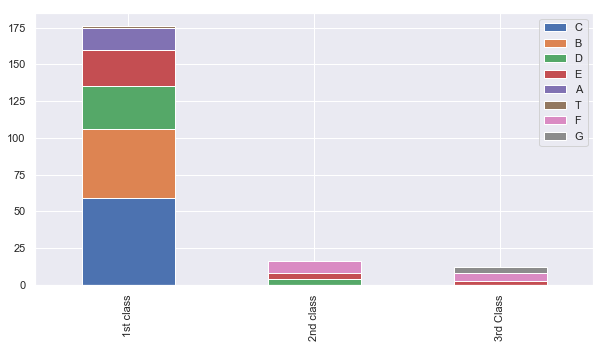

In [129]:
pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class','3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [130]:
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [131]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [132]:
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [133]:
train['Familysize']=train['SibSp']+train['Parch']+1
test['Familysize']=test['SibSp']+train['Parch']+1

In [134]:
family_map={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}

In [135]:
for dataset in train_test_data:
    dataset['Familysize']=dataset['Familysize'].map(family_map)

In [136]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,0.4


In [137]:
feature_drop=['SibSp','Parch','Ticket']
train=train.drop(feature_drop,axis=1)

In [138]:
test=test.drop(feature_drop,axis=1)

In [139]:
train=train.drop(['PassengerId'],axis=1)

In [140]:
train_data=train.drop(['Survived'],axis=1)

In [141]:
target=train['Survived']

In [142]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [143]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,2.0,0.0,2.0,2,0,0.0
6,0,1,0,3.0,2.0,1.6,0,0,0.0
7,0,3,0,0.0,1.0,2.0,0,3,1.6
8,1,3,1,2.0,0.0,2.0,0,2,0.8
9,1,2,1,0.0,2.0,1.8,1,2,0.4


In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [146]:
clf=KNeighborsClassifier(n_neighbors=13)

In [147]:
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)

In [148]:
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [149]:
print(round(np.mean(score)*100),2)

83.0 2


In [150]:
clf=DecisionTreeClassifier()

In [151]:
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100),2)


[0.76666667 0.82022472 0.75280899 0.76404494 0.88764045 0.7752809
 0.83146067 0.82022472 0.74157303 0.78651685]
79.0 2


In [152]:
clf=RandomForestClassifier()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100),2)


[0.78888889 0.83146067 0.79775281 0.73033708 0.83146067 0.80898876
 0.84269663 0.80898876 0.7752809  0.80898876]
80.0 2


C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [153]:
clf=GaussianNB()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100),2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.79775281
 0.76404494 0.80898876 0.86516854 0.83146067]
79.0 2


In [154]:
clf=SVC()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100),2)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]
84.0 2


C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [155]:
clf=SVC()
clf.fit(train_data,target)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [156]:
test_data=test.drop('PassengerId',axis=1).copy()

In [157]:
prediction=clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [166]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null float64
Embarked      418 non-null int64
Title         418 non-null float64
Familysize    418 non-null float64
dtypes: float64(5), int64(3)
memory usage: 26.2 KB


In [165]:
test_data['Title']=test_data['Title'].fillna(0)
test_data['Familysize']=test_data['Familysize'].fillna(np.mean(test_data['Familysize']))

In [163]:
sum(test_data['Title'].isnull())

0

In [167]:
prediction=clf.predict(test_data)

In [173]:
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})
submission.to_csv('submission.csv')

In [183]:
submission=pd.read_csv('submission.csv')

In [184]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
